# Evaluating a Solution

Now, let's copy our solution in the `sol` variable in the cell below an run it. Remember that the simulation is stochastic, so it's a good idea to make some attempts and see what happens:

Starting maximum pseudolikelihood estimation (MPLE):
Evaluating the predictor and response matrix.
Maximizing the pseudolikelihood.
Finished MPLE.
Stopping at the initial estimate.
EpiModel 1.7.0 onward renamed the birth rate parameter b.rate to a.rate. See documentation for details.



Starting Network Simulation...
Sim = 1/1
EpiModel Summary
Model class: netsim

Simulation Details
-----------------------
Model type: SIR
No. simulations: 1
No. time steps: 7
No. NW modes: 1

Model Statistics
------------------------------
Time: 7 
------------------------------ 
                mean  sd    pct
Suscept.         319   0  0.701
Infect.          136   0  0.299
Recov.             0   0  0.000
Total            455   0  1.000
S -> I            78   0     NA
I -> R             0   0     NA
Arrival ->         0   0     NA
S Departure ->     0   0     NA
I Departure ->    24   0     NA
R Departure ->     0   0     NA
------------------------------ 


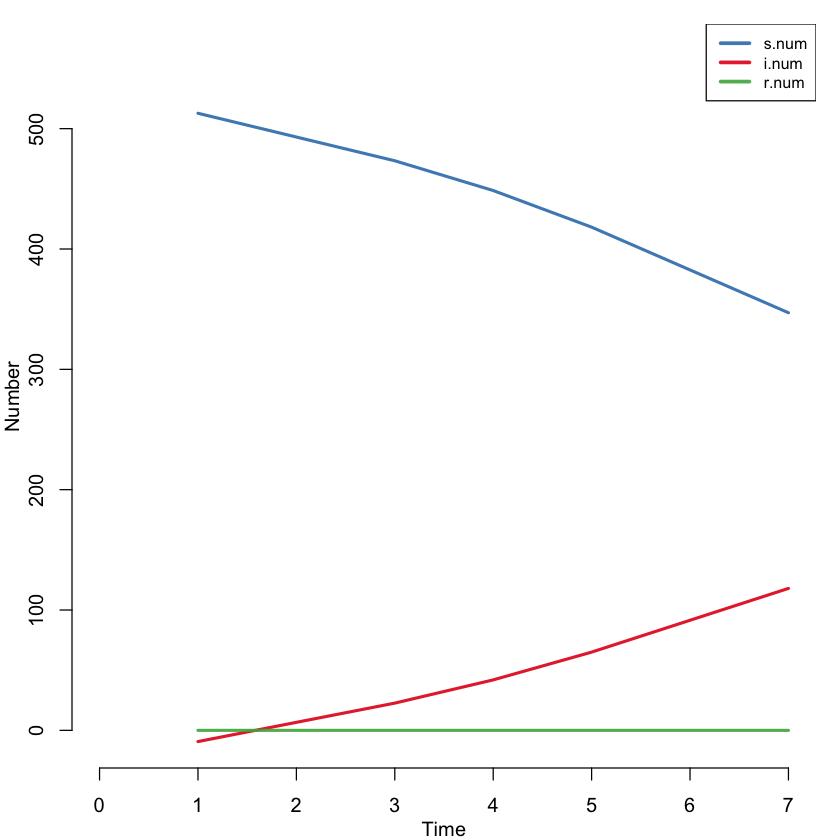

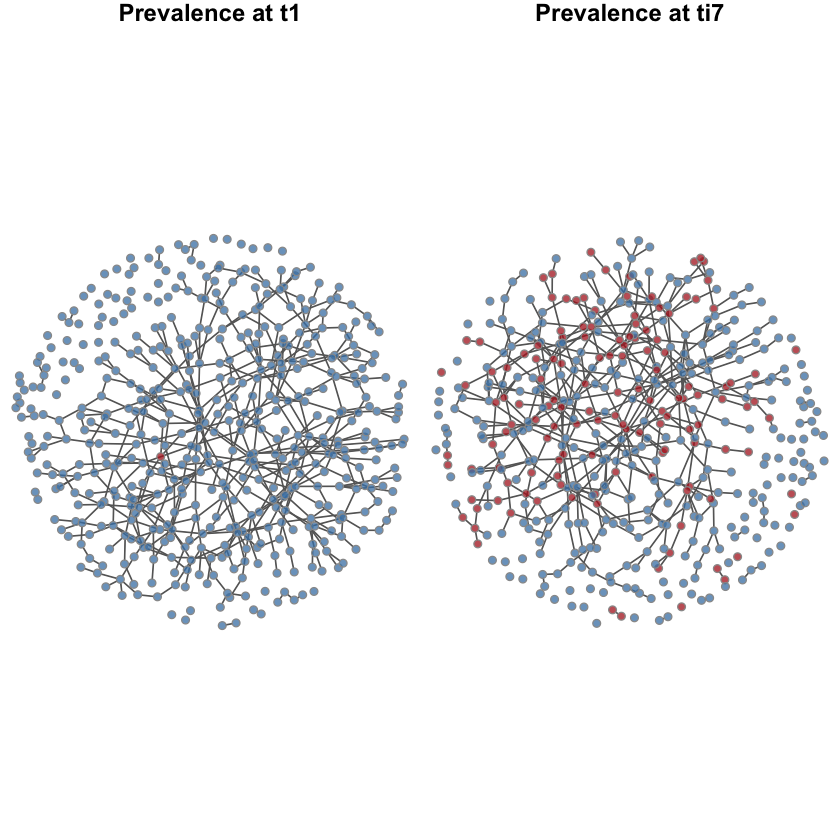

In [5]:
# Load simulation function
source('sim.R')

# Default setup
#sol = c(0.004, 0.700, 3.000, 0.000, 0.050, 0.000)

# Paste the evaluation string
sol = c(0.002, 0.700, 1.800, 0.000, 0.000, 0.250)

here.they.come(edge.ratio=sol[1], inf.prob=sol[2], act.rate=sol[3], rec.rate=sol[4],
     ds.rate=sol[5], di.rate=sol[6])

I don't know about you, but the doomsday scenario is still a bit too much likely for my taste...

## What is Going on?

There are two distinct, but related, issues here:

1. The ML model is handled by an optimization solver, which my end up finding a "weak spot" in the approximation, e.g. an input configuration for which the prediction is particularly off.
2. Sometimes, the most typical task specification in Machine Learning are not the best suited once the ML model is handled by a solver.

Ideally, the first issue should be dealt with via active learning: so far this has never been employed in the context of EML, so this is an open research topic!

The second issue is well investigated in this paper by [Zico Kolter et al.](https://arxiv.org/abs/1703.04529): the approach they propose, however, does not scale well 